In [7]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

C:\Users\risha\anaconda3\lib\site-packages\fastbook\__init__.py:18: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [8]:
from fastbook import *
from fastai.vision.widgets import *

In [9]:
import fastai
from fastai.vision.all import *

In [10]:
azure_key = os.environ.get('AZURE_SEARCH_KEY', '5169e7f3103e49d58cda6eb7be3a2adc')

In [11]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [13]:
results = search_images_bing(azure_key, 'lasagne')
ims = results.attrgot('content_url')
len(ims)

150

In [17]:
destination_path = 'images/test_lasagne.jpg'
image_link = 'https://th.bing.com/th/id/OIP.JO3gUoHczvbuBmRFuANAKQHaE8?pid=Api&rs=1'
download_url(image_link, destination_path)

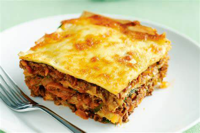

In [21]:
image = Image.open(destination_path)
image.to_thumb(200, 200)

### pasta-classifier training

In [22]:
pasta_types = ['lasagne', 'ravioli', 'spaghetti', 'rigatoni', 'fettucini', 'macaroni']
path = Path('pasta')
path.mkdir()

In [25]:
for pasta in pasta_types:
    destination_path = (path/pasta)
    destination_path.mkdir(exist_ok = True)
    results = search_images_bing(azure_key, f'{pasta} pasta')
    download_images(destination_path, urls=results.attrgot('contentUrl'))


In [33]:
images = get_image_files(path)
failed = verify_images(images)
failed.map(Path.unlink)

(#8) [None,None,None,None,None,None,None,None]

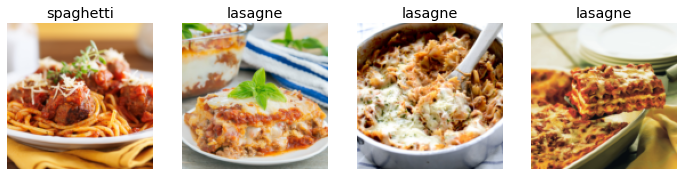

In [35]:
pasta = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

dls = pasta.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

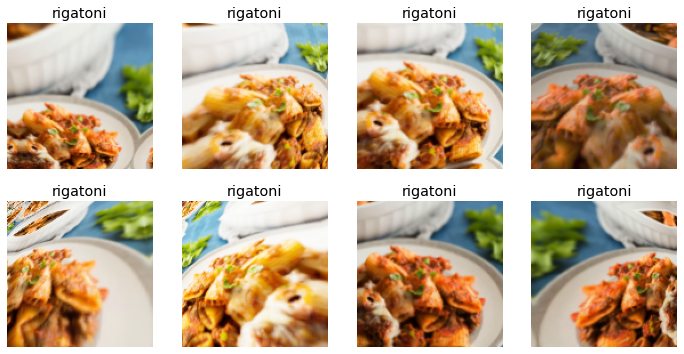

In [37]:
pasta = pasta.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = pasta.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

### train the model

In [46]:
pasta = pasta.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls_final = pasta.dataloaders(path, num_workers = 0)


In [ ]:
learn = cnn_learner(dls_final, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.536133,1.309366,0.517647,03:27


C:\Users\risha\anaconda3\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
C:\Users\risha\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,error_rate,time
